In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

**Reading dataset**

In [135]:
bookings_df = pd.read_csv('Bookings.csv')
sessions_df = pd.read_csv('Sessions.csv')

In [136]:
bookings_df.info()
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column     

In [137]:
bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [138]:
sessions_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


**Preprocessing steps**

In [139]:
label_encoder = LabelEncoder()

In [140]:
categorical_columns_bookings = ['customer_id', 'booking_id']
for column in categorical_columns_bookings:
    bookings_df[column] = label_encoder.fit_transform(bookings_df[column])

In [141]:
bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,178,320,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,228,64,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,117,338,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,126,245,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,209,138,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [142]:
sessions_df.head()


,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [143]:
categorical_columns_sessions = ['session_id', 'search_id','booking_id']
for column in categorical_columns_sessions:
    sessions_df[column] = label_encoder.fit_transform(sessions_df[column].astype(str))

In [144]:
sessions_df.tail()

,session_id,search_id,search_time,session_starting_time,booking_id
1492,58,424,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,24
1493,25,109,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,338
1494,25,1319,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,338
1495,58,343,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,338
1496,25,203,2021-12-23T17:34:52Z,2021-12-23T17:29:33.217Z,62


In [145]:
sessions_df['booking_id'] = sessions_df['booking_id'].replace(338, 0)

In [146]:
sessions_df.tail()

,session_id,search_id,search_time,session_starting_time,booking_id
1492,58,424,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,24
1493,25,109,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,0
1494,25,1319,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,0
1495,58,343,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,0
1496,25,203,2021-12-23T17:34:52Z,2021-12-23T17:29:33.217Z,62


In [147]:
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')
sessions_df['session_starting_time'] = pd.to_datetime(sessions_df['session_starting_time'], format='ISO8601')



In [148]:
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'], format='ISO8601')

In [149]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   session_id             1497 non-null   int64              
 1   search_id              1497 non-null   int64              
 2   search_time            1497 non-null   datetime64[ns, UTC]
 3   session_starting_time  1497 non-null   datetime64[ns, UTC]
 4   booking_id             1497 non-null   int64              
dtypes: datetime64[ns, UTC](2), int64(3)
memory usage: 58.6 KB


In [150]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    int64              
 1   booking_id         339 non-null    int64              
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

**Q/A**


*1. Find the number of distinct bookings, sessions, and searches from the given datasets.*

In [151]:

distinct_bookings = len(bookings_df['booking_id'].unique())

distinct_sessions = len(sessions_df['session_id'].unique())

distinct_searches = len(sessions_df['search_id'].unique())

print(f"Number of distinct bookings: {distinct_bookings}")
print(f"Number of distinct sessions: {distinct_sessions}")
print(f"Number of distinct searches: {distinct_searches}")

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


*2. How many sessions have more than one booking*

In [152]:

session_booking_counts = sessions_df.groupby('session_id')['booking_id'].nunique()

sessions_with_multiple_bookings = ((session_booking_counts > 1).sum()-1)

print(f"Number of sessions with more than one booking: {sessions_with_multiple_bookings}")


Number of sessions with more than one booking: 224


*Which days of the week have the highest number of bookings? Also, draw a pie chart to
show the distribution for all days of the week*

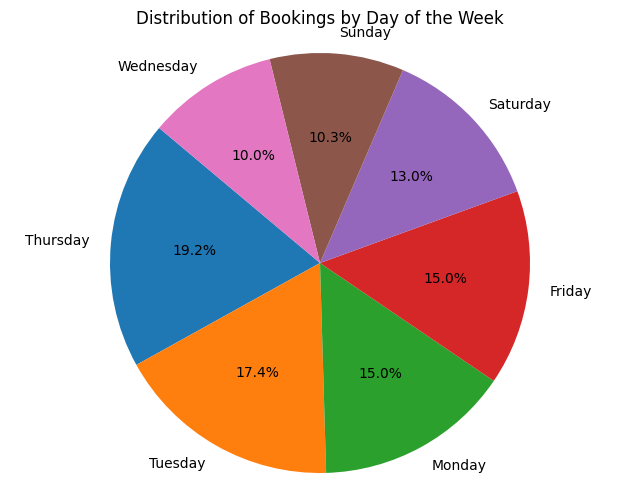

In [153]:

bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()
bookings_by_day = bookings_df['day_of_week'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(bookings_by_day, labels=bookings_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')
plt.show()

*4. For each of the service names, display the total number of bookings and the total Gross
Booking Value in INR*

Service Name   |   Total Bookings   |   Total GBV (INR)
-------------------------------------------------------
GOIBIBO        |               186 |      5897637.97
MMT            |                48 |       665669.08
YATRA          |               105 |      3378702.13


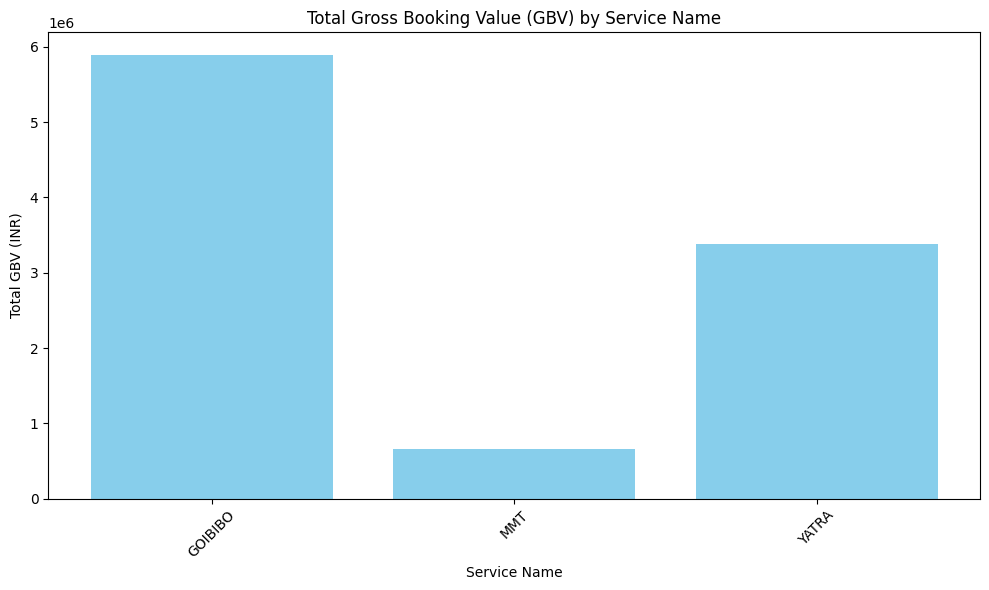

In [154]:
service_summary = bookings_df.groupby('service_name').agg({
    'booking_id': 'count',
    'INR_Amount': 'sum'
}).reset_index()


service_summary.columns = ['service_name', 'total_bookings', 'total_gbv_inr']

print("Service Name   |   Total Bookings   |   Total GBV (INR)")
print("-------------------------------------------------------")
for index, row in service_summary.iterrows():
    print(f"{row['service_name']:14} | {row['total_bookings']:17} | {row['total_gbv_inr']:15.2f}")

service_summary_info = service_summary.to_string(index=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(service_summary['service_name'], service_summary['total_gbv_inr'], color='skyblue')
plt.xlabel('Service Name')
plt.ylabel('Total GBV (INR)')
plt.title('Total Gross Booking Value (GBV) by Service Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*5. For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?*

In [155]:

multiple_bookings_customers = bookings_df['customer_id'].value_counts()[bookings_df['customer_id'].value_counts() > 1].index

multiple_bookings = bookings_df[bookings_df['customer_id'].isin(multiple_bookings_customers)]

route_frequency = multiple_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='booking_count')

most_booked_route = route_frequency.loc[route_frequency['booking_count'].idxmax()]


from_city = most_booked_route['from_city']
to_city = most_booked_route['to_city']
booking_count = most_booked_route['booking_count']

print(f"The most booked route for customers with more than one booking is from {from_city} to {to_city} with {booking_count} bookings.")

The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France with 5 bookings.


*6. Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?*

In [156]:
city_departure_counts = bookings_df['from_city'].value_counts()
cities_with_at_least_5_departures = city_departure_counts[city_departure_counts >= 5].index

filtered_bookings = bookings_df[bookings_df['from_city'].isin(cities_with_at_least_5_departures)]
avg_days_to_departure = filtered_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()


sorted_avg_days = avg_days_to_departure.sort_values(by='days_to_departure', ascending=False)

top_3_cities = sorted_avg_days.head(3)

print("Top 3 departure cities where customers book mostly in advance:")
print(top_3_cities)

Top 3 departure cities where customers book mostly in advance:
    from_city  days_to_departure
1     Bālāpur          46.166667
4  Devanhalli          29.583333
2     Chennai          26.187500


*7. Plot a heatmap displaying correlations of the numerical column and report which pair
of numerical columns in the bookings dataset, have the maximum correlation?*

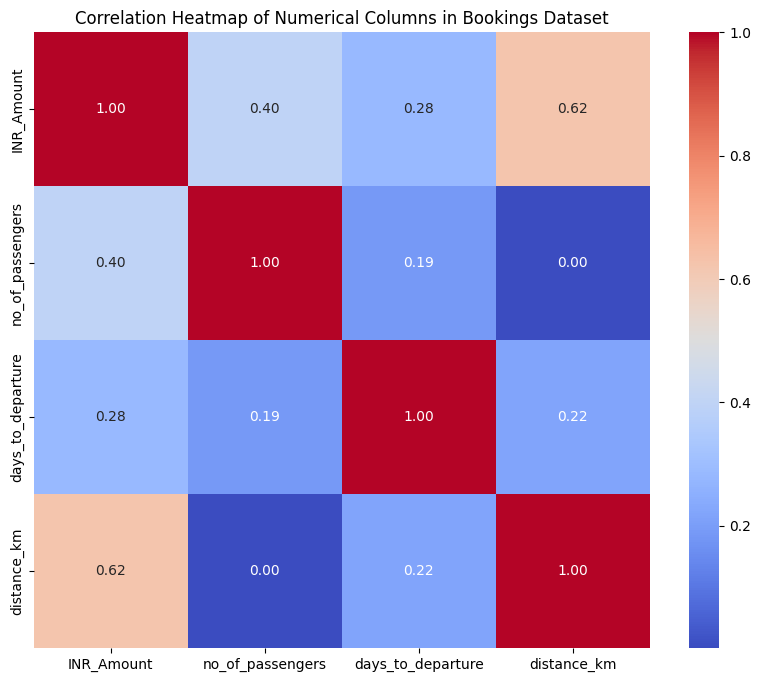

The pair of numerical columns with the maximum correlation:
INR_Amount  INR_Amount    1.0
dtype: float64


In [157]:
import seaborn as sns

numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']

correlation_matrix = bookings_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap of Numerical Columns in Bookings Dataset')
plt.show()

max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(1)
print(f"The pair of numerical columns with the maximum correlation:")
print(max_corr_pair)

*8. For each service, which is the most used device type for making bookings on the
platform?*

In [158]:

most_used_device_per_service = bookings_df.groupby('service_name')['device_type_used'].agg(lambda x: x.mode().iloc[0])

print("Most used device type for each service:")
for service, device_type in most_used_device_per_service.items():
    print(f"Service: {service}, Most used device type: {device_type}")

Most used device type for each service:
Service: GOIBIBO, Most used device type: IOS
Service: MMT, Most used device type: Desktop
Service: YATRA, Most used device type: Desktop


*9. Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the number
of bookings performed by each device type*

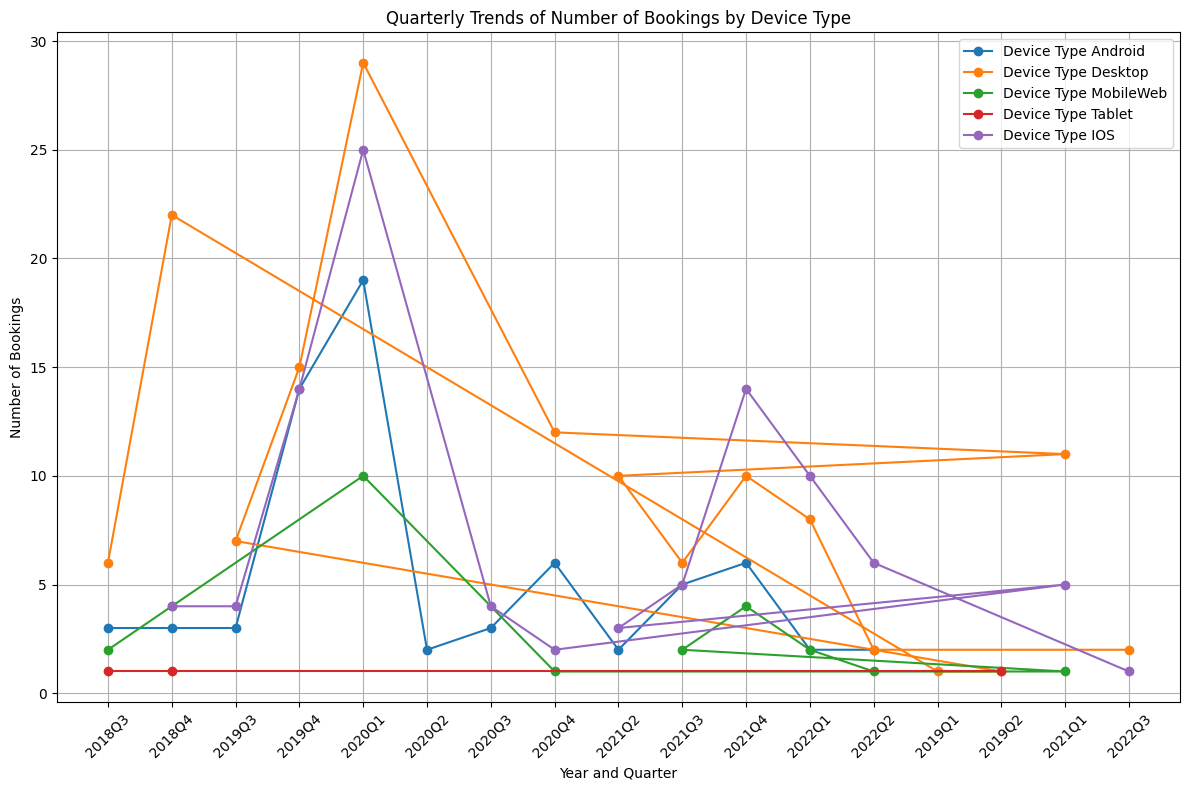

In [159]:

bookings_df['year'] = bookings_df['booking_time'].dt.year
bookings_df['quarter'] = bookings_df['booking_time'].dt.quarter

quarterly_device_bookings = bookings_df.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='num_bookings')

device_types = quarterly_device_bookings['device_type_used'].unique()

plt.figure(figsize=(12, 8))

for device_type in device_types:
    data = quarterly_device_bookings[quarterly_device_bookings['device_type_used'] == device_type]
    label = f'Device Type {device_type}'
    plt.plot(data['year'].astype(str) + 'Q' + data['quarter'].astype(str), data['num_bookings'], marker='o', label=label)

plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Trends of Number of Bookings by Device Type')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*10. Consider the following example:12 customers performed a total of 100 searches but
 only a few of them performed 10 bookings in total.
searches=100 bookings=10 customers=12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:
• What is the average oBSR for each month of the year?
• What is the average oBSR for each day of the week?
• Plot a time series of oBSR on all the given dates.*

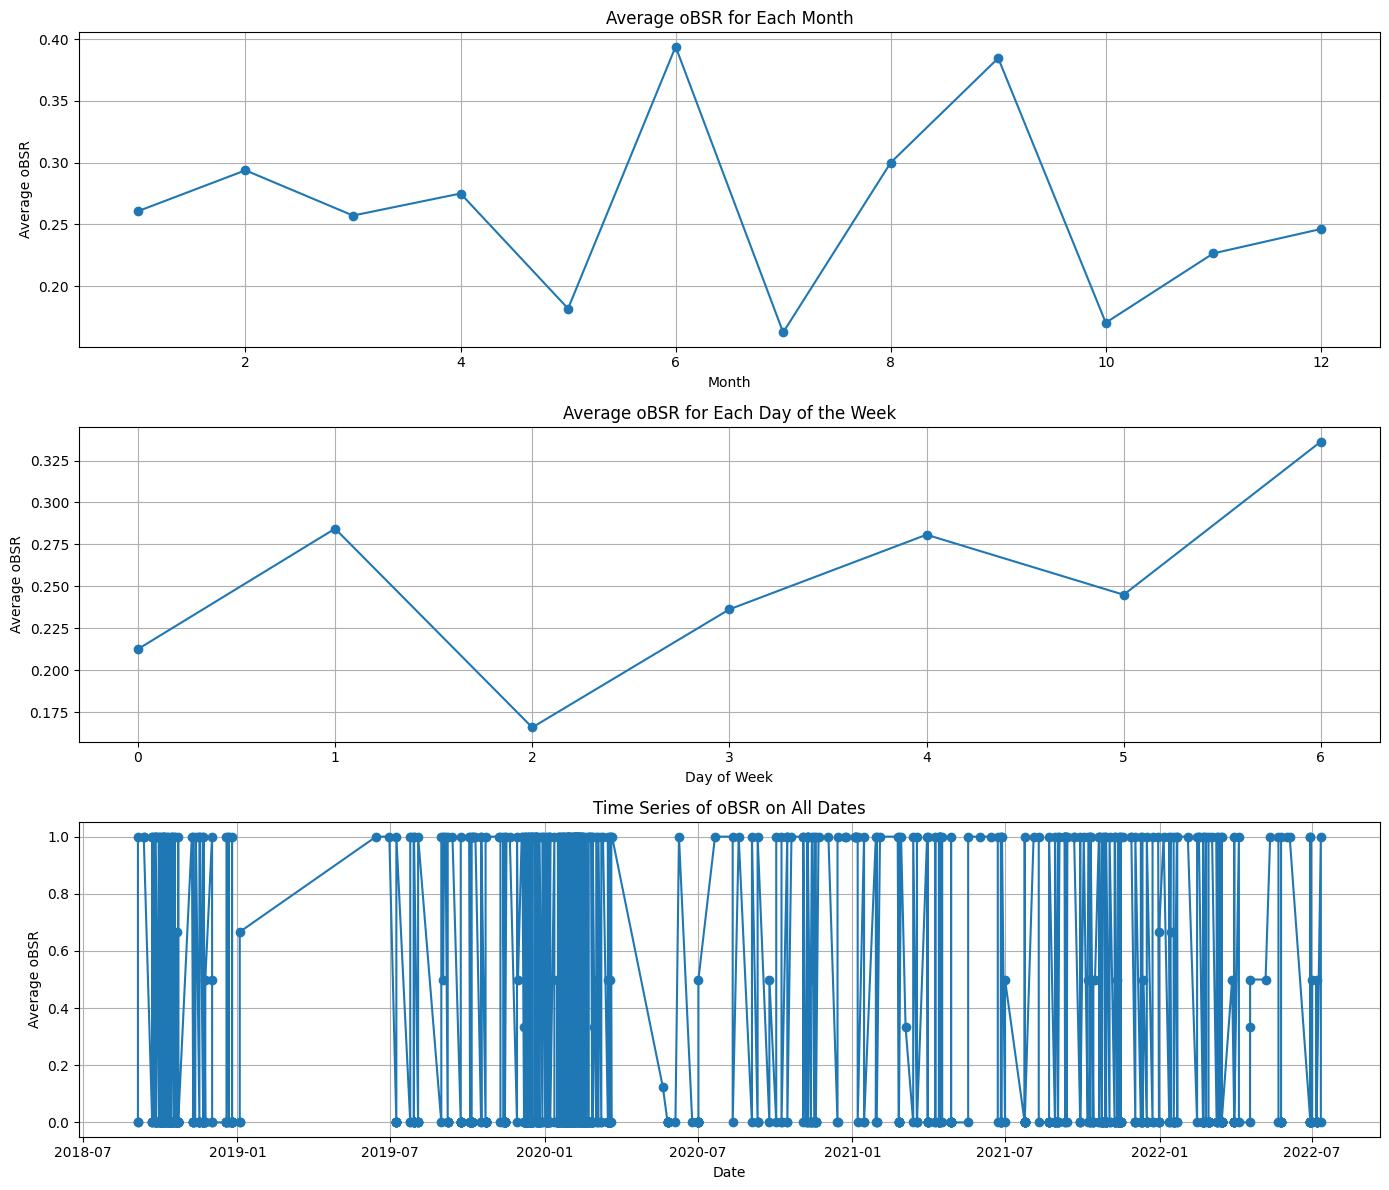

In [160]:
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], utc=True)

sessions_df['is_booking'] = sessions_df['booking_id'].apply(lambda x: 1 if x > 0 else 0)

sessions_df['month'] = sessions_df['search_time'].dt.month
monthly_obSR = sessions_df.groupby('month')['is_booking'].mean().reset_index(name='avg_oBSR')

sessions_df['day_of_week'] = sessions_df['search_time'].dt.dayofweek
weekly_obSR = sessions_df.groupby('day_of_week')['is_booking'].mean().reset_index(name='avg_oBSR')


daily_obSR = sessions_df.groupby('search_time')['is_booking'].mean().reset_index(name='avg_oBSR')


plt.figure(figsize=(14, 12))


plt.subplot(3, 1, 1)
plt.plot(monthly_obSR['month'], monthly_obSR['avg_oBSR'], marker='o')
plt.title('Average oBSR for Each Month')
plt.xlabel('Month')
plt.ylabel('Average oBSR')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(weekly_obSR['day_of_week'], weekly_obSR['avg_oBSR'], marker='o')
plt.title('Average oBSR for Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average oBSR')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(daily_obSR['search_time'], daily_obSR['avg_oBSR'], marker='o')
plt.title('Time Series of oBSR on All Dates')
plt.xlabel('Date')
plt.ylabel('Average oBSR')
plt.grid(True)

plt.tight_layout()
plt.show()